In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import os
import helpers.settings as settings
import matplotlib.pyplot as plt
import seaborn as sns



# **Overview** #

In [3]:
train = pd.read_csv(os.path.join(os.getcwd(), settings.DATA_DIR, 'train.csv'))
test = pd.read_csv(os.path.join(os.getcwd(), settings.DATA_DIR, 'test.csv'))
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# data types of columns
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [5]:
# statistical summaries of numerical columns
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


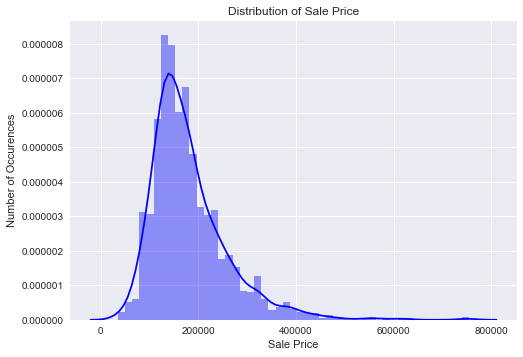

In [6]:
sns.distplot(train['SalePrice'], color="b")
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price");


The Sale Price distribution show:
- Deviate from the normal distribution.
- Have appreciable positive skewness.
- Show peakedness.


In [7]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# **Numerical Features** #

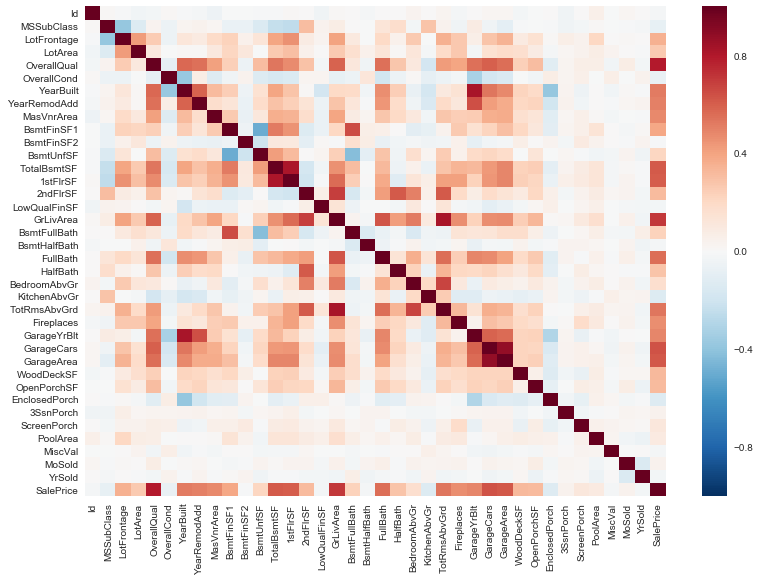

In [8]:
#correlation matrix
correlation_matrix = train.corr()
fig, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(correlation_matrix)
fig.savefig(os.path.join(os.getcwd(), settings.FIG_DIR, 'correlation_matrix.png'))


In [23]:
# list numerical features ranked on their correlation with sale price
correlation_dict = correlation_matrix['SalePrice'].to_dict()
print("List numerical features ranked on their correlation with sale price\n")
for element in sorted(correlation_dict.items(),
                      key = lambda x: abs(x[1]), reverse=True):
    print("{0}: \t{1}".format(*element))

List numerical features ranked on their correlation with sale price

SalePrice: 	1.0
OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
GarageYrBlt: 	0.48636167748786213
MasVnrArea: 	0.4774930470957107
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.35179909657067854
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
KitchenAbvGr: 	-0.1359073708421417
EnclosedPorch: 	-0.12857795792595636
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MSSubClass: 	-0.08428413512659523
Over

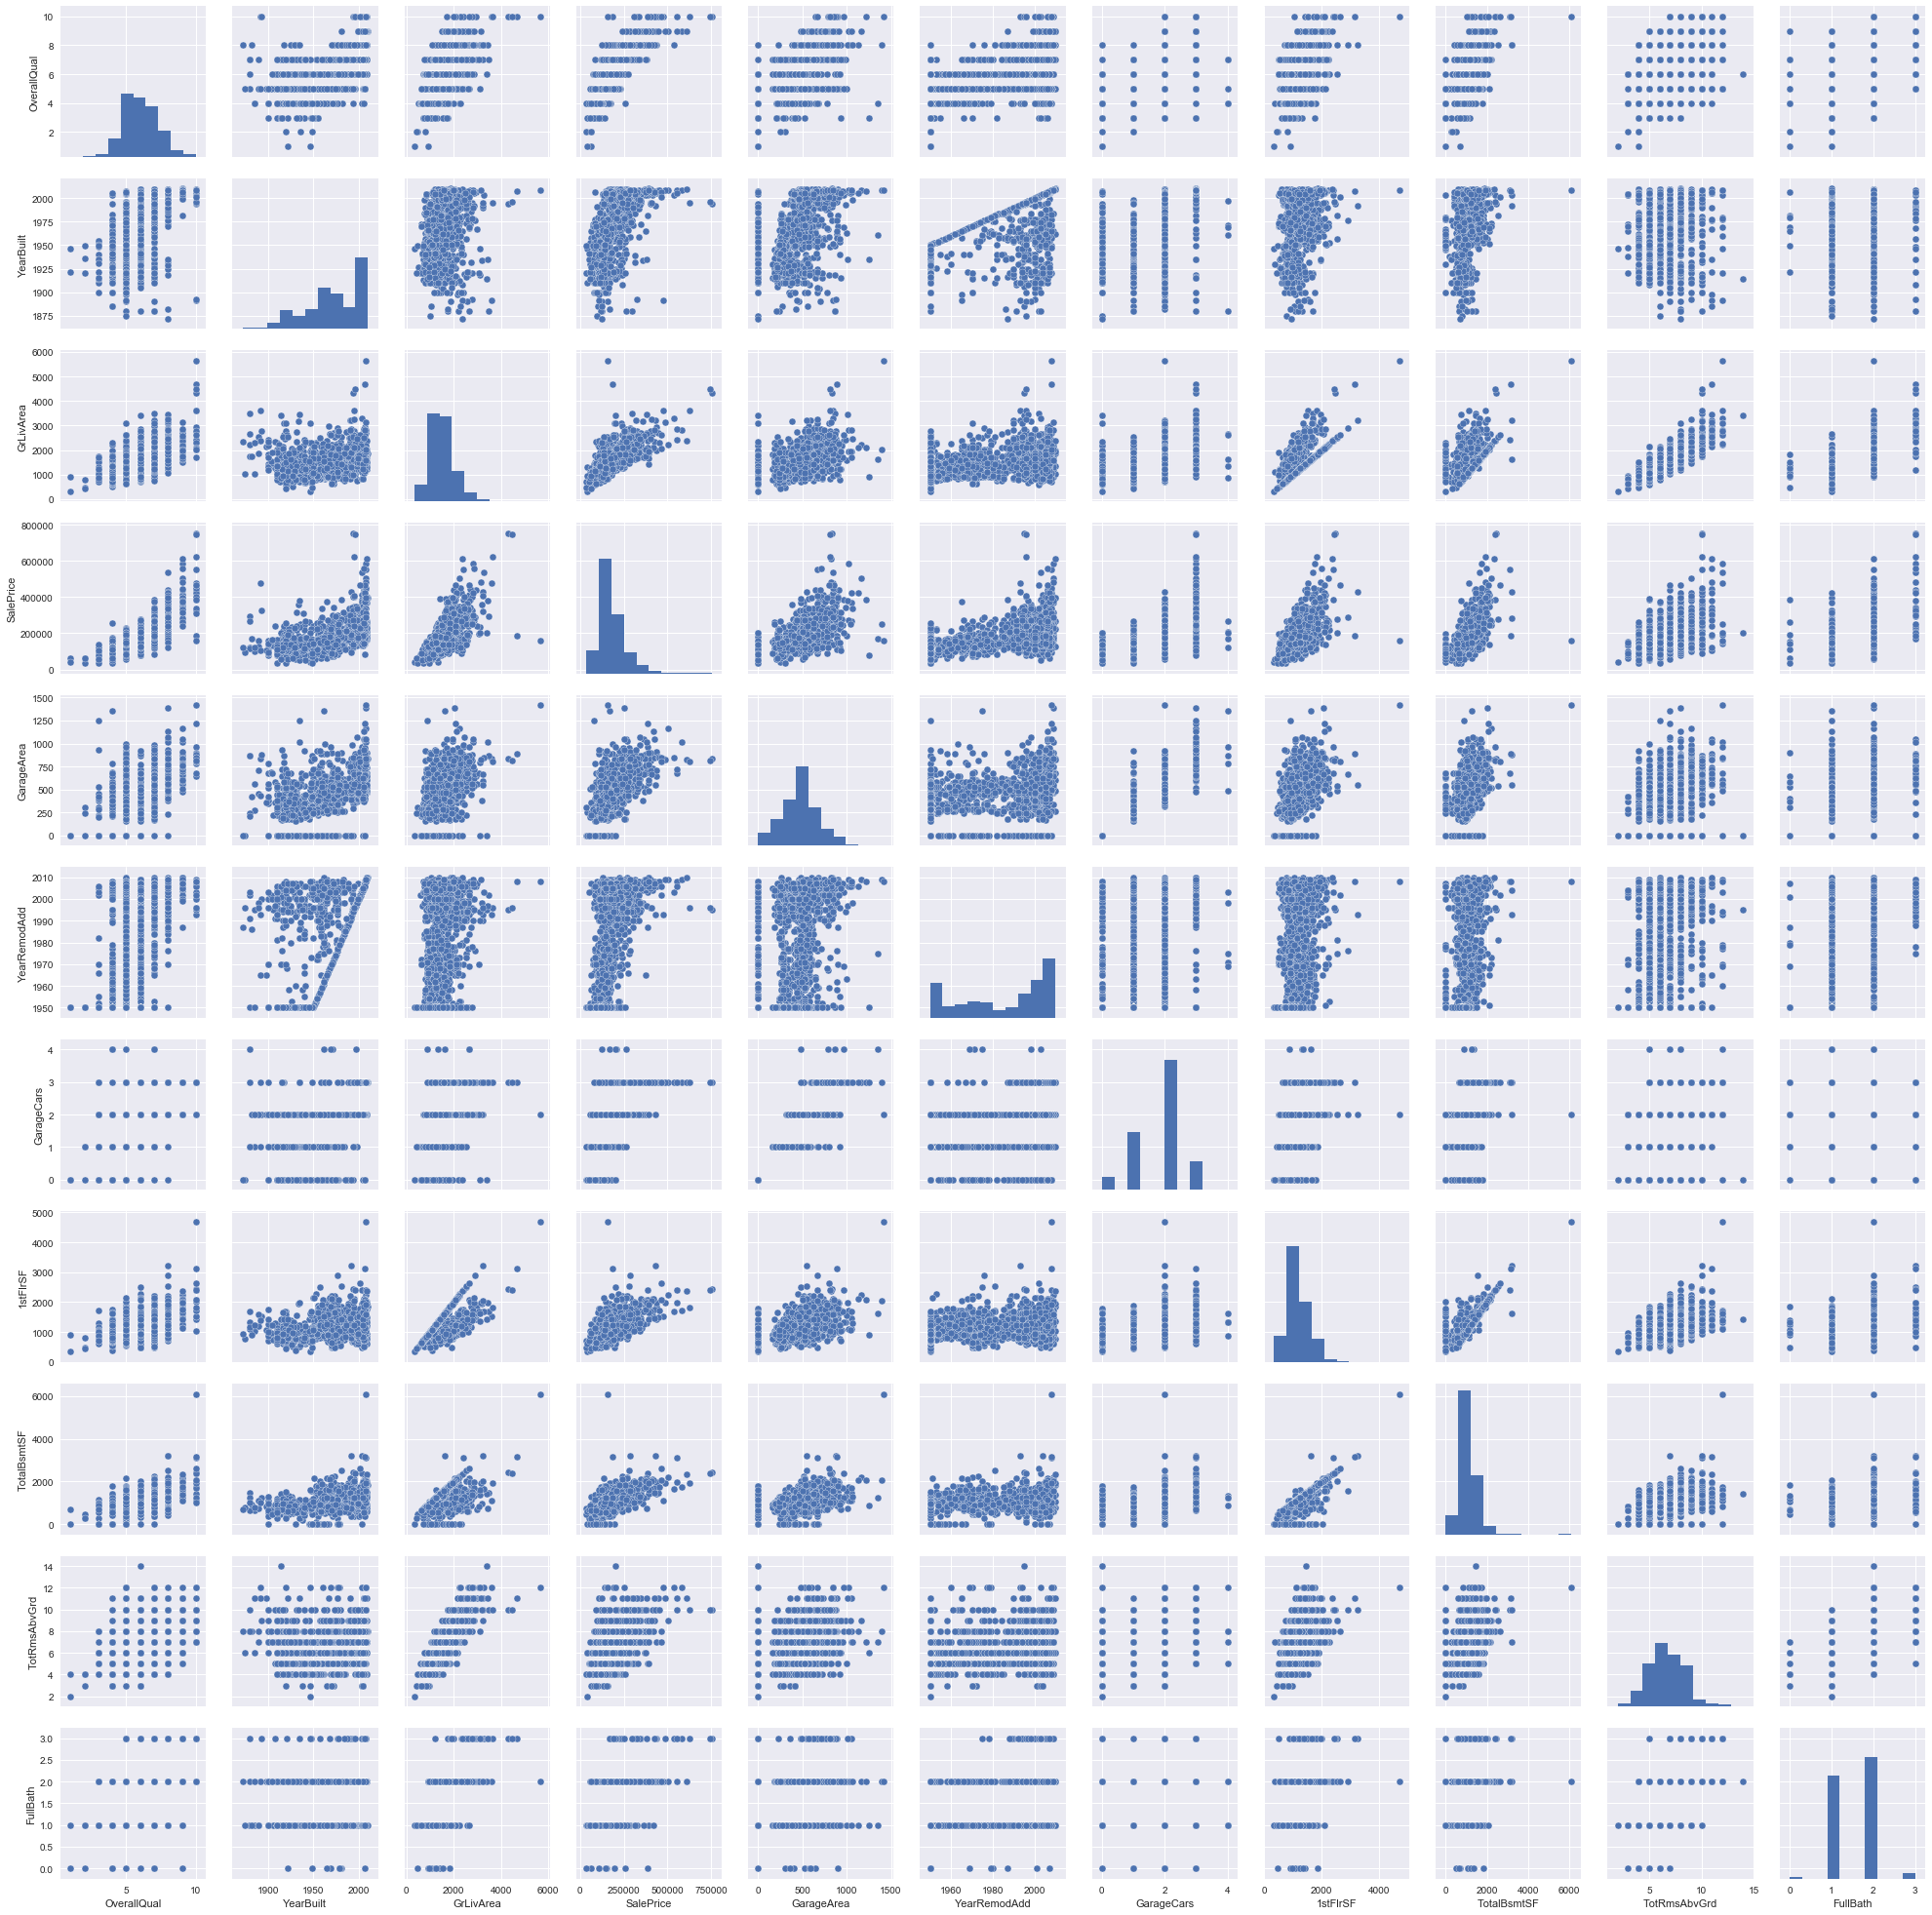

In [43]:
#scatterplot
column_names = [key for key, val in correlation_dict.items() if val > 0.5]
sns.set()
sns.pairplot(train[column_names])

fig.savefig(os.path.join(os.getcwd(), settings.FIG_DIR, 'scatter_plots.png'))

# **Categorical features** #

In [33]:
# get list of categorical features
categorical_columns = train.select_dtypes(include=['object']).columns.values
print(categorical_columns)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


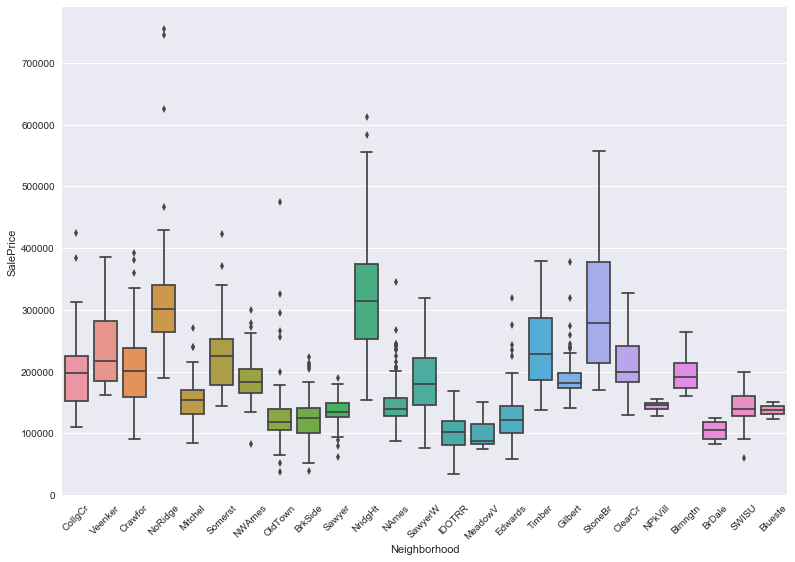

In [45]:
fig, ax = plt.subplots(figsize=(13, 9))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = train)
xt = plt.xticks(rotation=45)

fig.savefig(os.path.join(os.getcwd(), settings.FIG_DIR, 'neighborhood.png'))


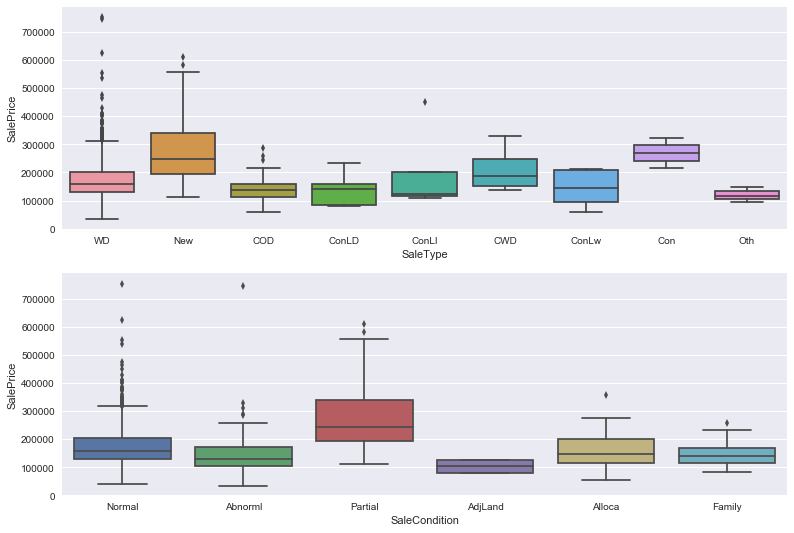

In [47]:
fig, ax = plt.subplots(2, 1, figsize = (13, 9))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = train, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = train, ax = ax[1])

fig.savefig(os.path.join(os.getcwd(), settings.FIG_DIR, 'sales.png'))


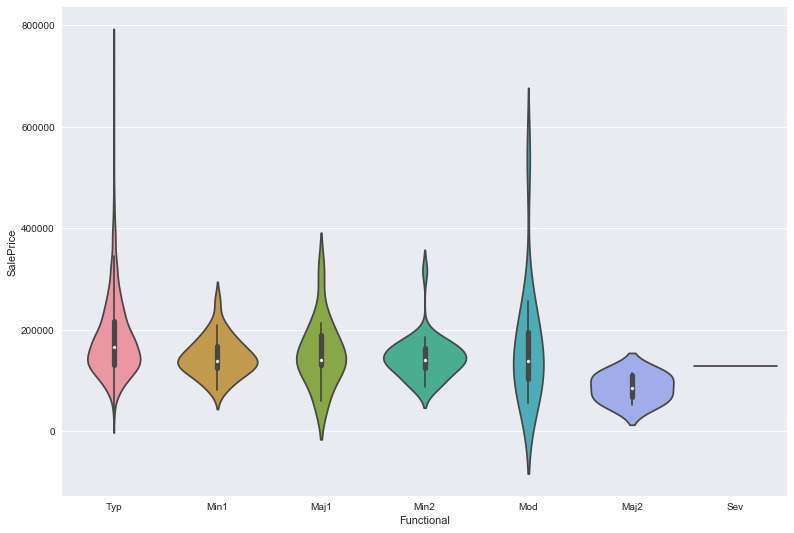

In [48]:
fig, ax = plt.subplots(figsize=(13, 9))
sns.violinplot('Functional', 'SalePrice', data = train)

fig.savefig(os.path.join(os.getcwd(), settings.FIG_DIR, 'functional.png'))


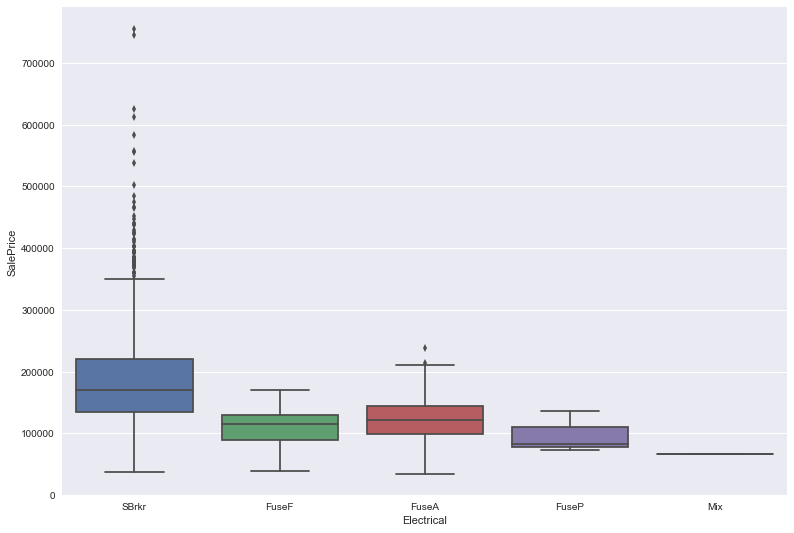

In [49]:
fig, ax = plt.subplots(figsize = (13, 9))
sns.boxplot('Electrical', 'SalePrice', data = train)

fig.savefig(os.path.join(os.getcwd(), settings.FIG_DIR, 'electrical.png'))